# Project VI - Solution of Initial Value Problems

In [1]:
# All libraries will be imported in this cell
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve as fs
from tabulate import tabulate as table

Consider the initial-value-problem:

$$
\begin{align*}
x^{''}(t)+2\gamma x^{'}+\omega^{2} x(t)=0 \\
x(0)=x_0 \\ 
x^{'}(0)=\gamma x_0
\end{align*}
$$

with $0 < \gamma < \omega$. It's solution is given by
$$x(t)=x_0 e^{-\gamma t} \cos(\beta t)$$

where $\beta = \sqrt{\omega^{2}-\gamma^{2}}$. This equation can be written as a first order system, with $x^{'}=y$, and $y^{'}=-2\gamma y - \omega^2 x$.

In [2]:
def x(t, g, B, x0):
    return x0 * np.exp(-g * t) * np.cos(B * t)

In [3]:
def f(x, y, g ,o):
    return (-2 * g * x) - (o**2) * y

## Your task

### Explicit Midpoint

Implement the Explicit Midpoint method (EMP) doing
$$\frac{x_{n+1}−x_{n−1}}{2h}=y_n\\
\frac{y_{n+1}−y_{n−1}}{2h}=−2\gamma y_n− \omega^2x_n $$

In [4]:
def eulers(t, x, xp_0, g, o, h):
    return xp_0 + h * f(t, x, g, o)

In [5]:
def mid_point(t, IV):    
    xp0 = x0 * gamma
    
    y = np.zeros(steps+1)
    xl = np.zeros(steps+1)
    t = np.arange(t0, t+h, h)
    
    xl[0] = x0
    y[0] = xp0
    
    for i in range(0, steps):
        if i == 0:
            xl[i+1] = 2 * h * y[i]
            y[i+1] = -4 * gamma * h * y[i] - 2 * omega**2 * h * xl[i]
        else:
            xl[i+1] = xl[i-1] + 2 * h * y[i]
            y[i+1] = y[i-1] - 4 * gamma * h * y[i] - 2 * omega**2 * h * xl[i]
    return t, xl

### Implicit Midpoint

Implement the Implicit Midpoint method (IMP) doing
$$ \frac{x_{n+1}−x_n}{h}=\frac{y_{n+1}+y_n}{2}\\
\frac{y_{n+1}−y_n}{h}=−2\gamma \frac{y_{n+1}+y_n}{2}−\omega^2\frac{x_{n+1}+x_n}{2}$$

In [6]:
def IMP(p):
    X, Y = p
    
    deriv = np.array([0., 0.])
    deriv[0]= (Y + x[1]) / 2 - (X - x[0]) / h
    deriv[1]= -2 * gamma * (Y + x[1]) / 2 - omega**2 * (X + x[0]) / 2 - (Y - x[1]) / h
    
    return deriv

def implicit_mid_point():
    time = np.zeros(1)
    
    global x
    x = np.array([x0, xp0])
    
    traj = x

    for i in range(1, steps+1):
        t = i * h
        time = np.hstack([time, t])
        
        x_new = fs(IMP, x) 
        
        traj = np.vstack([traj, x_new])
        x = x_new
    
    return time, traj

### Non-Standard Implicit Midpoint

Implement the Non-standard Implicit Midpoint method (NSIMP) doing
$$\frac{x_{n+1}−e^{−\gamma h}x_n}{h}=\frac{y_{n+1}+e^{−\gamma h}y_n}{2}\\
\frac{y_{n+1}−e^{−\gamma h}y_n}{h}=−\omega^2\frac{x_{n+1}+e^{−\gamma h}x_n}{2}$$

In [7]:
def NSIMP(p):
    X, Y = p
    deriv = np.array([0., 0.])
    deriv[0] = (Y + np.exp(-gamma * h) * xn[1]) / 2 - (X - np.exp(-gamma * h) * xn[0]) / h
    deriv[1] = -omega**2 * (X + np.exp(-gamma * h) * xn[0]) / 2 - (Y - np.exp(-gamma * h) * xn[1]) / h
    
    return deriv

def ns_implicit_mid(): 
    time = np.zeros(1)
    
    global xn
    
    xn = np.array([x0, xp0])
    traj = xn

    for i in range(1, steps+1):
        t = i * h
        
        time = np.hstack([time, t])
        x_new = fs(NSIMP, xn) 
        
        traj = np.vstack([traj, x_new])
        xn = x_new
    
    return time, traj

 - All three methods are second order and they do not differ much in terms of computational cost; demonstrate this numerically.  I expect several table with the results.

 - For $\gamma=0$  the  implicit  methods  are  equivalent,  and  we  expect  they  are  superior  to  the explicit method; check this numerically using long time simulations with varioush, $\omega$, $x_0$.

- Experiment on the long-time accuracy of the methods for small values of $\gamma>0$.

- Run experiments to help you fully understand what happens to the approximations as $\gamma$ increases.

- If there is, in fact, a ’breaking point’ for any method as $\gamma$ increases determine what it is and how it depends upon $h$ or $\omega$.

In [8]:
def exact(t, IV):
    t0, x0, steps, g, o = IV
    h = (t - t0) / steps
    
    y = np.zeros(steps+1)
    t = np.arange(t0, t+h, h)
    b = np.sqrt((o**2)-(g**2))
    
    for i in range(0, (steps+1)):
        y[i] = x0 * np.exp(-g * t[i]) * np.cos(b * t[i])
    return t, y

def relative_error(exact, aprox, steps):
    rel = np.zeros((steps+1,))
    
    for i in range(0, steps+1):
        rel[i] = abs(exact[i] - aprox[i]) / abs(exact[i])
        
    return rel

In [9]:
def results(t, y_mid, y_imp, y_nsimp, error, y_exact):
    return list(zip(range(y_mid.shape[0]), t, y_mid, y_imp, y_nsimp, error, y_exact))

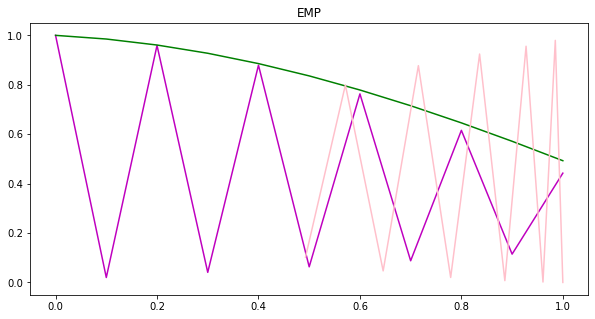

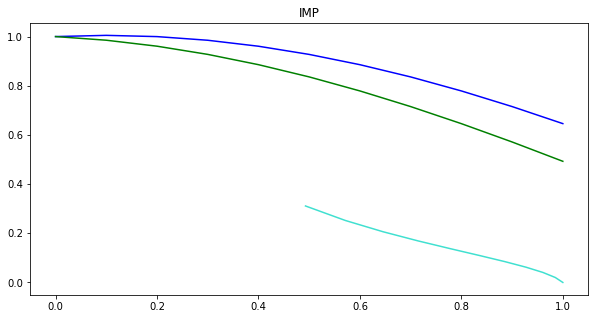

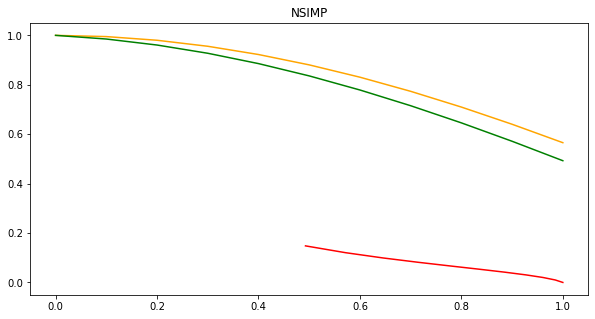

In [19]:
############# Am I supposed to keep the globals in the notebook? #############

global t0
t0 = 0

global t
t = 1

global x0
x0 = 1

global steps
steps = 10

global h
h = (t - t0) / steps

global gamma
gamma = .1

global omega
omega = 1

global xp0
xp0 = x0 * gamma

# IV = (t_0, x_0, xp_0, steps, gamma, omega)
IV = (t0, x0, steps, gamma, omega)


#print(ti)
#print(xi)
# print(tn)
# print(xn)
# print(yx)
# plt.figure(figsize=(10,5))
# plt.plot(t_mid, y_mid, "r", t_imp, y_imp, "r", t_nsimp, y_nsimp, "orange", t_exact, y_exact, "b")
#plt.plot(ti, xi, 'r', tx, yx, 'g')
#plt.plot(t_exact, rel)
# plt.show()

#IV = (0, 1, 100, .0001, 1)
t_mid, y_mid = mid_point(1, IV)
t_imp, y_imp = implicit_mid_point()
t_nsimp, y_nsimp = ns_implicit_mid()
t_exact, y_exact = exact(1, IV)

############# I wasn't sure what to use for approx, so I'm not sure I'm doing this the right way. #############
############# I would get this error if I used just y_imp and y_nsimp: `setting an array element with a sequence`, so I changed it. #############
error_mid = relative_error(y_exact, y_mid, steps)
error_imp = relative_error(y_exact, y_imp[:,0], steps)
error_nsimp = relative_error(y_exact, y_nsimp[:,0], steps)


############# I put each method in a separate graph, because it looked really crowded when I added each error. Are they supposed to be separated? ############# 
############# I also wasn't sure about how to plot the errors, so they probably look a little weird. #############

plt.figure(figsize=(10,5))
plt.title("EMP")
plt.plot(t_mid, y_mid, "m")
plt.plot(t_exact, y_exact, "g")
plt.plot(y_exact, error_mid, "pink")
plt.show()

plt.figure(figsize=(10,5))
plt.title("IMP")
plt.plot(t_imp, y_imp[:,0], "b")
plt.plot(t_exact, y_exact, "g")
plt.plot(y_exact, error_imp, "turquoise")
plt.show()

plt.figure(figsize=(10,5))
plt.title("NSIMP")
plt.plot(t_nsimp, y_nsimp[:,0], "orange")
plt.plot(t_exact, y_exact, "g")
plt.plot(y_exact, error_nsimp, "r")
plt.show()

In [77]:
############# The tables work, I just need to add the right error, when 
# table_results = results(t_mid, y_mid, y_imp, y_nsimp, error, y_exact)
# print(table(table_results, headers=["n", "t", "y_mid", "y_imp", "y_nsimp", "error", "y_exact"]))

  n    t      y_mid  y_imp                      y_nsimp                                 error    y_exact
---  ---  ---------  -------------------------  ---------------------------------  ----------  ---------
  0  0    1          [1.  0.1]                  [1.  0.1]                          0            1
  1  0.1  0.02       [ 1.00493827 -0.00123457]  [ 9.94987738e-01 -2.46895220e-04]  0.00998282   0.985153
  2  0.2  0.9592     [ 0.99985368 -0.10045725]  [ 0.98014991 -0.09850631]          0.0200813    0.960855
  3  0.3  0.040832   [ 0.98499443 -0.1967278 ]  [ 0.95582907 -0.19383747]          0.0305077    0.927532
  4  0.4  0.879199   [ 0.96070035 -0.28915373]  [ 0.9224556  -0.28534745]          0.0415059    0.885694
  5  0.5  0.0632308  [ 0.92739776 -0.37689811]  [ 0.88054165 -0.37219913]          0.0533769    0.835923
  6  0.6  0.763134   [ 0.88559351 -0.45918683]  [ 0.83067441 -0.45361842]          0.0665156    0.778868
  7  0.7  0.0877429  [ 0.83586843 -0.53531491]  [ 0.77350878 -

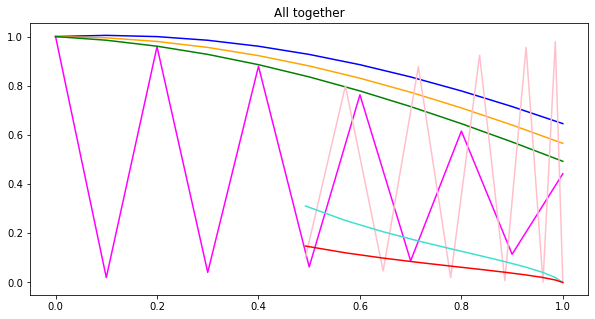

In [18]:
############# Or are all the methods supposed to be on the same plot? ############# 
error_mid = relative_error(y_exact, y_mid, steps)
error_imp = relative_error(y_exact, y_imp[:,0], steps)
error_nsimp = relative_error(y_exact, y_nsimp[:,0], steps)

plt.figure(figsize=(10,5))
plt.title("All together")

plt.plot(t_mid, y_mid, "magenta")
plt.plot(t_imp, y_imp[:,0], "b")
plt.plot(t_nsimp, y_nsimp[:,0], "orange")

plt.plot(t_exact, y_exact, "g")
plt.plot(y_exact, error_mid, "pink")
plt.plot(y_exact, error_imp, "turquoise")
plt.plot(y_exact, error_nsimp, "red")

plt.show()